In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# EDA of Uterine Cancer Data  

In [ ]:
df = pd.read_csv("/content/Uterine Corpus Endometrial Carcinoma.csv")

In [ ]:
df.head()

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,TCGA-5B-A90C,TCGA-5B-A90C-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID                        529 non-null    object 
 1   Sample ID                         529 non-null    object 
 2   Cancer Type Detailed              529 non-null    object 
 3   Overall Survival Status           529 non-null    object 
 4   Disease Free Status               414 non-null    object 
 5   Disease-specific Survival status  527 non-null    object 
 6   Mutation Count                    515 non-null    float64
 7   Fraction Genome Altered           519 non-null    float64
 8   Diagnosis Age                     526 non-null    float64
 9   MSI MANTIS Score                  526 non-null    float64
 10  MSIsensor Score                   528 non-null    float64
 11  Race Category                     497 non-null    object 
 12  Subtype 

In [ ]:
df.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,515.000000,519.000000,526.00000,526.000000,528.000000
mean,1046.423301,0.185959,63.76616,0.438948,6.395890
std,2734.365494,0.226088,11.06003,0.239666,10.175853
min,7.000000,0.000000,31.00000,0.237000,0.000000
25%,47.000000,0.003600,57.00000,0.283950,0.110000
50%,76.000000,0.067800,64.00000,0.311300,0.435000
75%,563.500000,0.314450,71.00000,0.543225,10.117500
max,25696.000000,0.948700,90.00000,1.304900,40.430000


In [ ]:
df.columns

Index(['Patient ID', 'Sample ID', 'Cancer Type Detailed',
       'Overall Survival Status', 'Disease Free Status',
       'Disease-specific Survival status', 'Mutation Count',
       'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score',
       'MSIsensor Score', 'Race Category', 'Subtype', 'Tumor Type'],
      dtype='object')

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Patient ID', 'Sample ID'])

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)


Unique values in 'Cancer Type Detailed':
['Uterine Endometrioid Carcinoma'
 'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma'
 'Uterine Mixed Endometrial Carcinoma']

Unique values in 'Disease Free Status':
[nan '0:DiseaseFree' '1:Recurred/Progressed']

Unique values in 'Disease-specific Survival status':
['0:ALIVE OR DEAD TUMOR FREE' '1:DEAD WITH TUMOR' nan]

Unique values in 'Overall Survival Status':
['0:LIVING' '1:DECEASED']

Unique values in 'Race Category':
['Black or African American' 'White' 'Asian' nan
 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native']

Unique values in 'Subtype':
['UCEC_CN_HIGH' 'UCEC_CN_LOW' 'UCEC_POLE' nan 'UCEC_MSI']

Unique values in 'Tumor Type':
['Endometrioid Endometrial Adenocarcinoma'
 'Serous Endometrial Adenocarcinoma'
 'Mixed Serous and Endometrioid Carcinoma']


<!-- POLE (Polymerase Epsilon) is a DNA polymerase involved in DNA replication. Mutations in the POLE gene can lead to a high mutation burden and are associated with a particular molecular subtype of endometrial cancer. -->

UCEC_CN_HIGH:

"UCEC" likely refers to Uterine Corpus Endometrial Carcinoma.
"_CN_HIGH" might indicate a high level of copy number alterations in the cancer cells.
Copy number alterations refer to changes in the number of copies of specific regions of DNA in the cancer cells compared to normal cells.
UCEC_CN_LOW:

Similar to the first subtype, "UCEC" likely refers to Uterine Corpus Endometrial Carcinoma.
"_CN_LOW" might indicate a low level of copy number alterations in the cancer cells.

POLE (Polymerase Epsilon) is a DNA polymerase involved in DNA replication. Mutations in the POLE gene can lead to a high mutation burden and are associated with a particular molecular subtype of endometrial cancer.

"UCEC_MSI" likely represents a molecular subtype characterized by microsatellite instability in endometrial cancer.

## Selected features for prediction:
1. * Cancer Type Detailed <br>
1. * Mutation Count<br>
1. * Fraction Genome Altered<br>
1. * Diagnosis Age<br>
1. * MSI MANTIS Score<br>
1. * MSIsensor Score<br>
1. * Subtype<br>
1. * Tumor Type<br>

## Target variable:
* Disease-specific Survival status

In [ ]:
selected_features = ['Cancer Type Detailed', 'Mutation Count', 'Fraction Genome Altered',
                     'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score', 'Subtype',
                     'Tumor Type', 'Disease-specific Survival status']


# Box of selected features

<ipython-input-11-461b6d58d658>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_selected.loc[:, 'Disease-specific Survival status'] = le.fit_transform(df_selected['Disease-specific Survival status'])


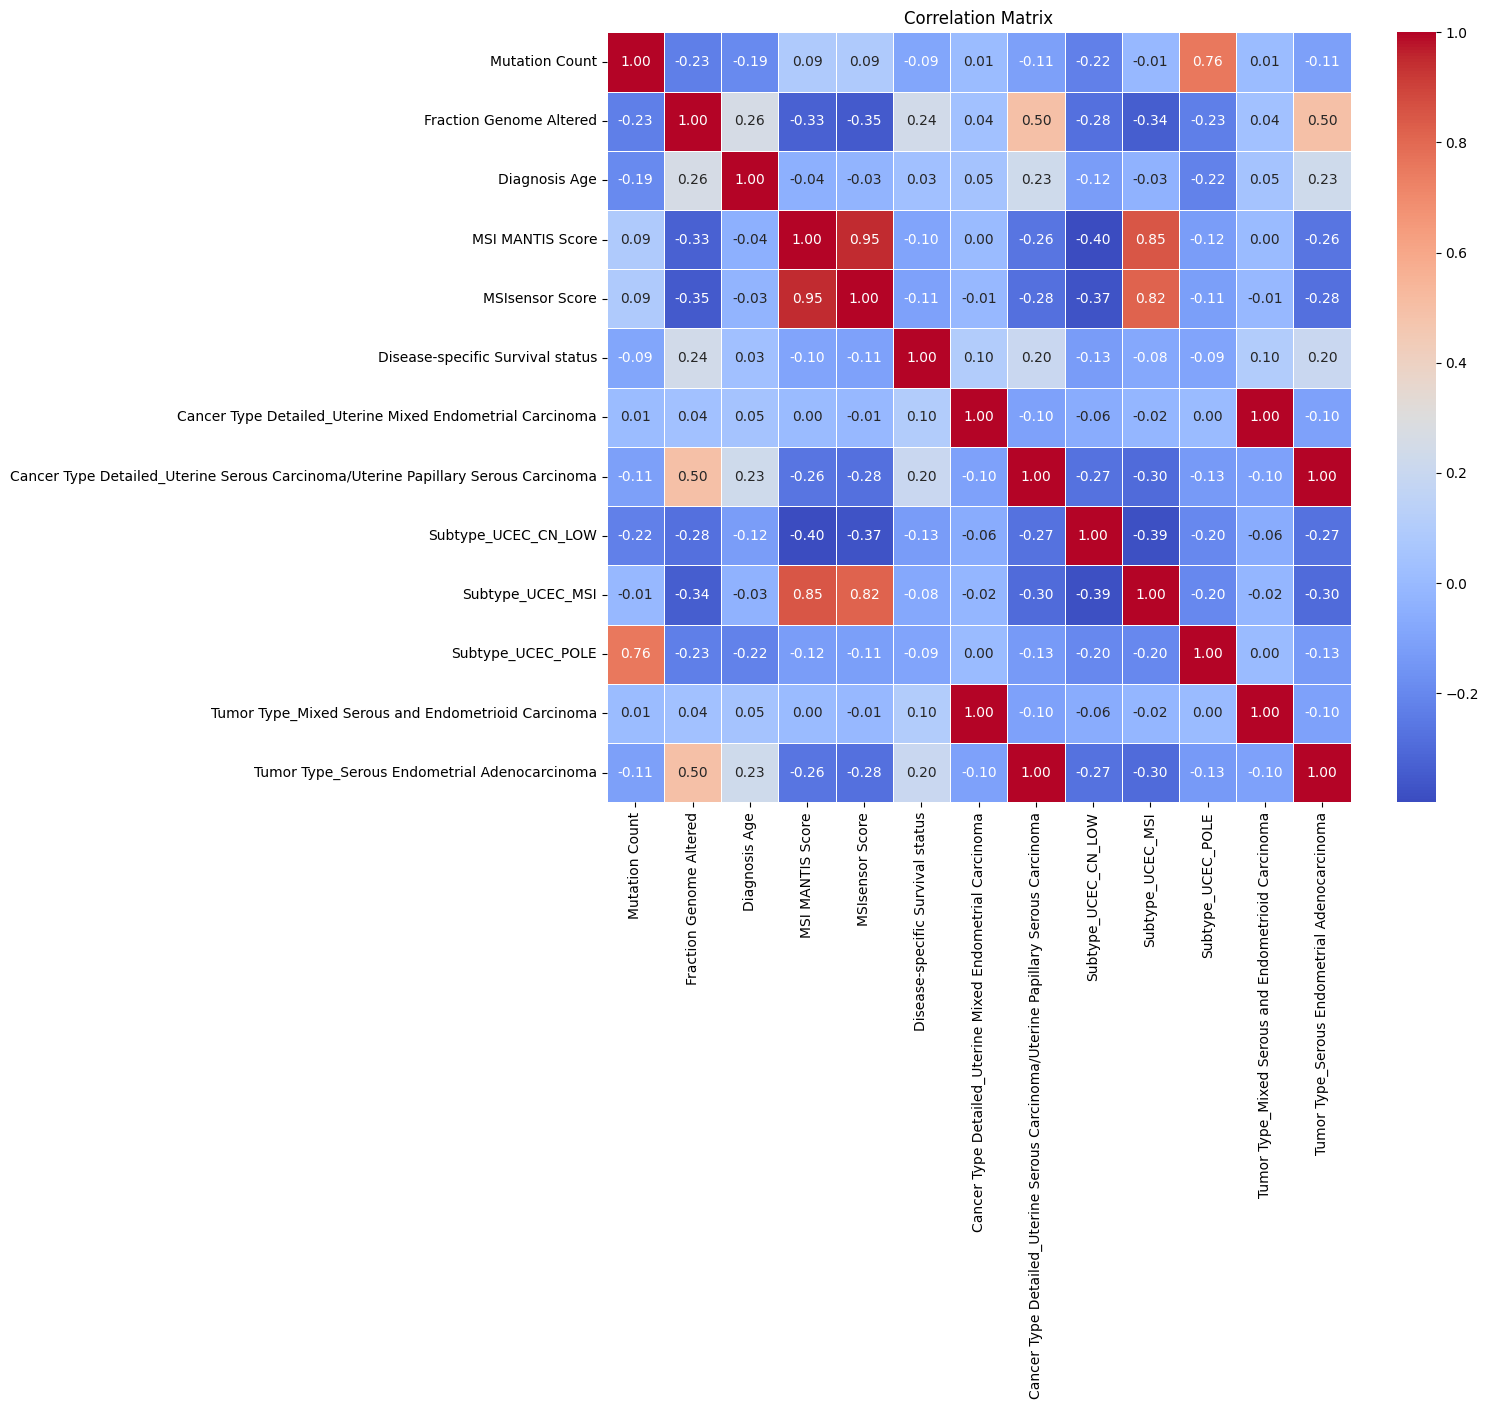

In [ ]:
df_selected = df[selected_features].copy()


le = LabelEncoder()
df_selected.loc[:, 'Disease-specific Survival status'] = le.fit_transform(df_selected['Disease-specific Survival status'])


df_selected = pd.get_dummies(df_selected, columns=['Cancer Type Detailed', 'Subtype', 'Tumor Type'], drop_first=True)

correlation_matrix = df_selected.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-12-9c6beed40e23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease-specific Survival status', data=df, palette='viridis')


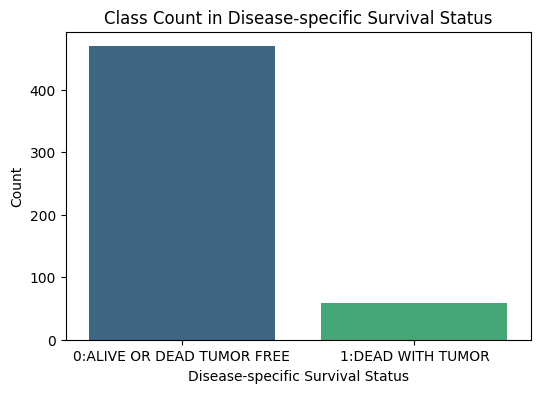

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Disease-specific Survival status', data=df, palette='viridis')
plt.title('Class Count in Disease-specific Survival Status')
plt.xlabel('Disease-specific Survival Status')
plt.ylabel('Count')
plt.show()

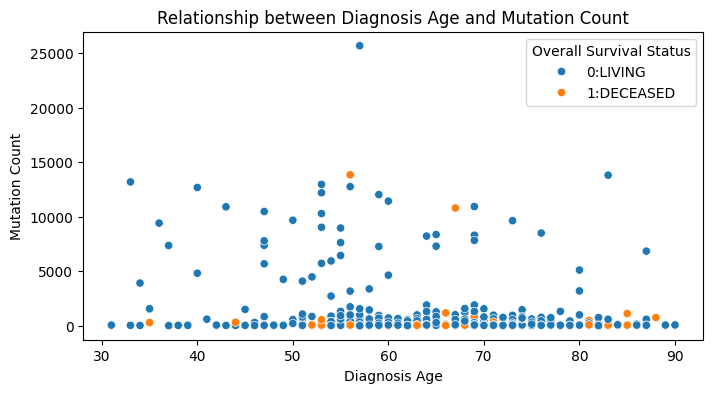


Correlation Matrix:
                Diagnosis Age  Mutation Count
Diagnosis Age        1.000000       -0.190637
Mutation Count      -0.190637        1.000000


In [ ]:
numeric_feature = 'Mutation Count'

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Diagnosis Age', y=numeric_feature, hue='Overall Survival Status', data=df)
plt.title(f'Relationship between Diagnosis Age and {numeric_feature}')
plt.xlabel('Diagnosis Age')
plt.ylabel(numeric_feature)
plt.show()

# Correlation matrix including 'Diagnosis Age' and 'Other Mutation Count'
numeric_columns = ['Diagnosis Age', numeric_feature]
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


# Handling missing data

In [ ]:
selected_features = ['Cancer Type Detailed', 'Mutation Count', 'Fraction Genome Altered',
                     'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score', 'Subtype',
                     'Tumor Type', 'Disease-specific Survival status']


selected_df = df[selected_features]


print(selected_df.isnull().sum())

Cancer Type Detailed                 0
Mutation Count                      14
Fraction Genome Altered             10
Diagnosis Age                        3
MSI MANTIS Score                     3
MSIsensor Score                      1
Subtype                             22
Tumor Type                           0
Disease-specific Survival status     2
dtype: int64


In [ ]:
selected_df = selected_df.dropna(subset=['Disease-specific Survival status', 'MSIsensor Score',
                                          'MSI MANTIS Score', 'Diagnosis Age'])


print(selected_df.isnull().sum())

Cancer Type Detailed                 0
Mutation Count                      13
Fraction Genome Altered             10
Diagnosis Age                        0
MSI MANTIS Score                     0
MSIsensor Score                      0
Subtype                             21
Tumor Type                           0
Disease-specific Survival status     0
dtype: int64


In [ ]:
mutation_count_stats = selected_df['Mutation Count'].describe()
msi_mantis_stats = selected_df['MSI MANTIS Score'].describe()

print("Mutation Count Statistics:")
print(mutation_count_stats)

print("\nMSI MANTIS Score Statistics:")
print(msi_mantis_stats)

Mutation Count Statistics:
count      508.000000
mean      1025.523622
std       2717.962848
min          7.000000
25%         47.000000
50%         75.500000
75%        551.500000
max      25696.000000
Name: Mutation Count, dtype: float64

MSI MANTIS Score Statistics:
count    521.000000
mean       0.437752
std        0.238634
min        0.237000
25%        0.283900
50%        0.311100
75%        0.541500
max        1.304900
Name: MSI MANTIS Score, dtype: float64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select categorical columns
categorical_columns = ['Cancer Type Detailed', 'Subtype', 'Tumor Type']
X = selected_df.drop('Disease-specific Survival status', axis=1)
y = selected_df['Disease-specific Survival status']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

#SMOTE

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


X_imputed = imputer.fit_transform(X_encoded)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)


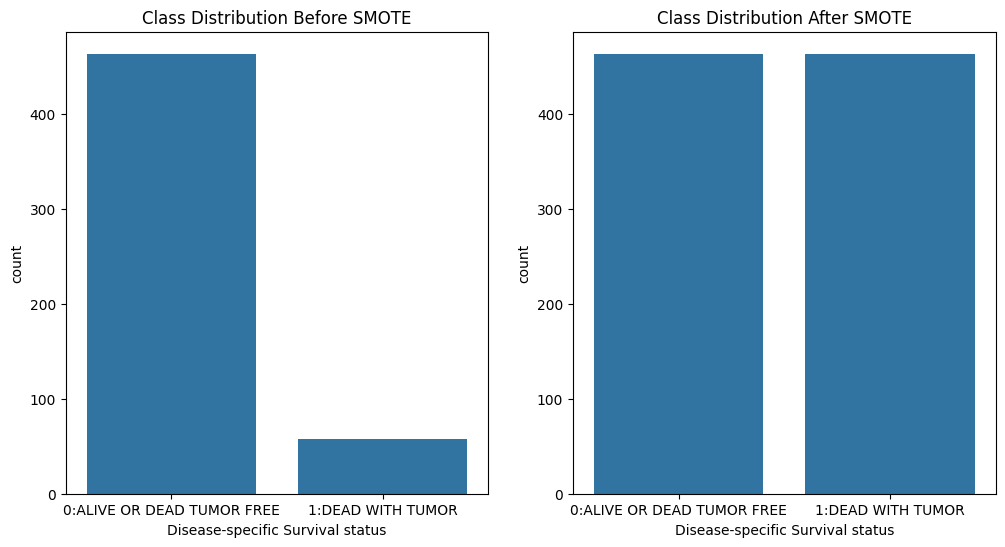

In [ ]:
# Plot the class distribution before and after applying SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Disease-specific Survival status', data=pd.DataFrame({'Disease-specific Survival status': y}))
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
sns.countplot(x='Disease-specific Survival status', data=pd.DataFrame({'Disease-specific Survival status': y_resampled}))
plt.title('Class Distribution After SMOTE')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


le = LabelEncoder()


y_train_encoded = le.fit_transform(y_train)
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Add a dropout layer with 50% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Add another dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, np.array(y_train_encoded), epochs=25, batch_size=16, validation_split=0.3, verbose=1)


Epoch 1/25
33/33 [==============================] - 2s 19ms/step - loss: 0.7089 - accuracy: 0.5328 - val_loss: 0.6049 - val_accuracy: 0.7342
Epoch 2/25
33/33 [==============================] - 0s 6ms/step - loss: 0.6458 - accuracy: 0.6371 - val_loss: 0.5694 - val_accuracy: 0.7342
Epoch 3/25
33/33 [==============================] - 0s 7ms/step - loss: 0.6039 - accuracy: 0.6911 - val_loss: 0.5556 - val_accuracy: 0.7387
Epoch 4/25
33/33 [==============================] - 0s 7ms/step - loss: 0.5828 - accuracy: 0.6931 - val_loss: 0.5505 - val_accuracy: 0.7613
Epoch 5/25
33/33 [==============================] - 0s 8ms/step - loss: 0.6023 - accuracy: 0.7027 - val_loss: 0.5469 - val_accuracy: 0.7613
Epoch 6/25
33/33 [==============================] - 0s 6ms/step - loss: 0.5665 - accuracy: 0.7297 - val_loss: 0.5460 - val_accuracy: 0.7432
Epoch 7/25
33/33 [==============================] - 0s 8ms/step - loss: 0.5420 - accuracy: 0.7413 - val_loss: 0.5422 - val_accuracy: 0.7568
Epoch 8/25
33/33 [=

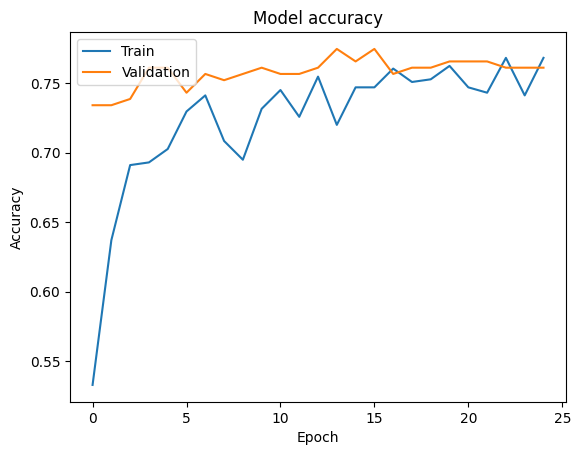

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
Aplt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()